# ML_MariaJoseCamacho - Segmentación de usuarios tipo en Spotify

## **Paso 1: Entendiendo el problema**


En este proyecto me propongo clasificar la raza de un caballo a partir de una imagen usando técnicas de Machine Learning. Esta clasificación automática es útil para veterinarios, ganaderos, jinetes y fotógrafos que necesitan identificar con precisión las razas para diversos fines, como cuidados específicos, entrenamiento adecuado o documentación fotográfica.

Al tratarse de un problema de clasificación supervisada, el objetivo es construir un modelo que pueda reconocer patrones visuales distintivos de cada raza y asignar correctamente la etiqueta correspondiente a una imagen nueva. Esto permite ahorrar tiempo y aumentar la precisión frente a métodos manuales o subjetivos.

Para ello, usaré un dataset público con imágenes clasificadas por raza, aplicaré técnicas de preprocesamiento y data augmentation para mejorar la calidad y balance del dataset, y entrenaré un modelo basado en transferencia de aprendizaje para aprovechar conocimientos previos en reconocimiento visual.


## **Paso 2: Carga de datos**
(Carga del dataset completo, no del sample)

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

Número total de imágenes en el dataset: 670


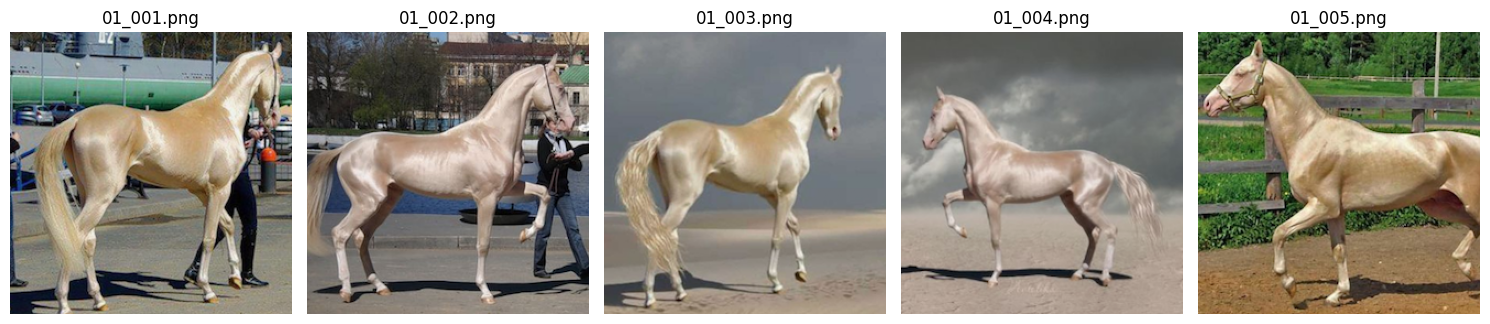

In [ ]:
import matplotlib.image as mpimg

DATASET_DIR = r'C:\Users\marij\Documents\dataset ML'

# Listar todas las imágenes en la carpeta dataset
images = [f for f in os.listdir(DATASET_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Número total de imágenes en el dataset: {len(images)}")

# Mostrar algunas imágenes ejemplo
num_ejemplos = 5
fig, axes = plt.subplots(1, num_ejemplos, figsize=(15, 5))

for i, ax in enumerate(axes):
    img_path = os.path.join(DATASET_DIR, images[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

## **Paso 3: Preparación del dataset**
(Selección de variables, tratamiento de nulos, escalado si es necesario)


In [12]:
# Tamaño fijo para redimensionar las imágenes
IMG_SIZE = (128, 128)

imagenes_aplanadas = []

for img_name in images:
    img_path = os.path.join(DATASET_DIR, img_name)
    # Leer imagen en escala de grises con OpenCV
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Redimensionar
    img_resized = cv2.resize(img, IMG_SIZE)
    # Aplanar
    img_flat = img_resized.flatten()
    imagenes_aplanadas.append(img_flat)

# Crear DataFrame
df = pd.DataFrame(imagenes_aplanadas)

# Reordenar aleatoriamente para evitar sesgos
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"DataFrame con {df.shape[0]} imágenes y {df.shape[1]} features (pixeles aplanados)")
df.head()

DataFrame con 670 imágenes y 16384 features (pixeles aplanados)


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,229,229,229,229,229,229,229,229,229,229,...,233,233,235,234,233,235,233,236,234,235
1,201,201,201,201,201,201,201,201,201,201,...,158,155,159,161,154,151,159,154,143,150
2,247,247,247,247,247,247,247,247,247,247,...,255,255,255,255,255,255,255,255,255,255
3,245,245,245,245,245,245,245,245,245,245,...,180,185,183,187,189,192,187,182,185,191
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [5]:
def extract_features(image_path):
    """
    Función para extraer características simples de una imagen.
    
    - Convierte la imagen a escala de grises.
    - La redimensiona a 128x128 para homogeneizar tamaño.
    - Calcula un histograma normalizado de intensidades (32 bins).
    - Calcula estadísticas básicas: media, desviación estándar, sesgo (skewness), curtosis.
    - Devuelve un vector con todas estas características concatenadas.
    """
    # Abrir imagen y convertir a escala de grises
    img = Image.open(image_path).convert('L')
    
    # Redimensionar imagen a tamaño uniforme para comparabilidad
    img = img.resize((128, 128))
    
    # Convertir imagen a array plano (vector)
    arr = np.array(img).flatten()
    
    # Histograma normalizado de 32 bins entre 0 y 255 (niveles de gris)
    hist, _ = np.histogram(arr, bins=32, range=(0, 255), density=True)
    
    # Estadísticas básicas del vector de pixeles
    mean = np.mean(arr)         # media
    std = np.std(arr)           # desviación estándar
    skewness = skew(arr)        # asimetría
    kurt = kurtosis(arr)        # curtosis
    
    # Concatenamos todas las características en un único vector
    features = np.concatenate((hist, [mean, std, skewness, kurt]))
    return features

# Extraemos características de todas las imágenes del dataset
features = []
for img_name in images:
    img_path = os.path.join(DATASET_DIR, img_name)
    feats = extract_features(img_path)
    features.append(feats)

features = np.array(features)
print(f"Vector de características generado con forma: {features.shape}")

Vector de características generado con forma: (670, 36)


## **Paso 4: Análisis exploratorio (Mini EDA)**
(Distribuciones, correlaciones, visualizaciones de features clave)



## **Paso 5: Reducción de dimensiones (opcional)**
(PCA si decides usarlo para visualización o clustering)

## **Paso 6: Clustering**
(Entrenamiento del modelo: k-means, número óptimo de clusters, silhouette score…)

## **Paso 7: Interpretación de los grupos**
(Describir los perfiles encontrados, visualizarlos en 2D si usaste PCA o t-SNE)

## **Paso 8: Guardado del modelo**
(Exportar modelo entrenado en formato `.joblib` en `/src/models`)

## **Paso 9: Conclusiones**
(Resumen del proyecto y aplicaciones reales del análisis)